In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt 
from tqdm import tqdm_notebook
import calendar
%matplotlib inline

In [2]:
train = pd.DataFrame.from_csv('./data/train.csv')

In [62]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [49]:
train["year"] = pd.to_datetime(train['pickup_datetime']).dt.year
train["month"] = pd.to_datetime(train['pickup_datetime']).dt.month
train["day"] = pd.to_datetime(train['pickup_datetime']).dt.weekday
train["pickup_hour"] = pd.to_datetime(train['pickup_datetime']).dt.hour

# Looping through arrays of data is very slow in python. 
# Numpy provides functions that operate on entire arrays of data, 
# which lets you avoid looping and drastically improve performance
train['distance'] = haversine_np(train['pickup_longitude'],
                                 train['pickup_latitude'],
                                 train['dropoff_longitude'],
                                 train['dropoff_latitude'])
train["mean_speed"] = (train.distance / train.trip_duration)*3600
train['alone'] = (train['passenger_count']==1).apply(int)

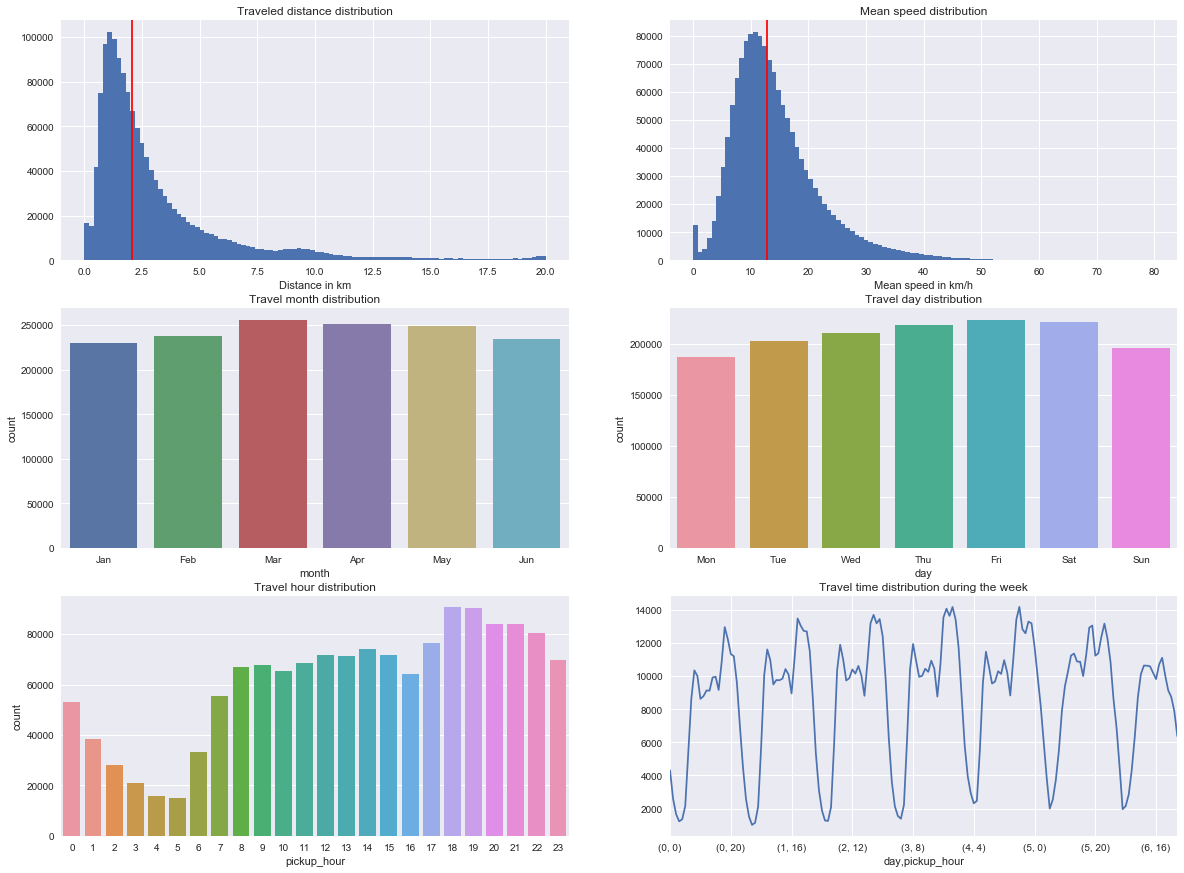

In [108]:
f, ax = plt.subplots(ncols=2, nrows=3, figsize=(20,15))
train[train.distance < 20].distance.hist(bins=100, ax=ax[0,0])
ax[0, 0].axvline(train[train.distance < 20].distance.median(), color='red')
ax[0, 0].set_xlabel('Distance in km')
ax[0, 0].set_title('Traveled distance distribution')

train[train.mean_speed < 80].mean_speed.hist(bins=100, ax=ax[0,1])
ax[0, 1].axvline(train[train.mean_speed < 80].mean_speed.median(), color='red')
ax[0, 1].set_xlabel('Mean speed in km/h')
ax[0, 1].set_title('Mean speed distribution')

sns.countplot(train.month, ax =ax[1,0])
_ = ax[1,0].set_xticklabels([calendar.month_abbr[int(k.get_text())] for k in ax[1,0].get_xticklabels()])
ax[1, 0].set_title('Travel month distribution')

sns.countplot(train.day, ax =ax[1,1])
_ = ax[1,1].set_xticklabels([calendar.day_abbr[int(k.get_text())] for k in ax[1,1].get_xticklabels()])
ax[1, 1].set_title('Travel day distribution')

sns.countplot(train.pickup_hour, ax =ax[2,0])
ax[2, 0].set_title('Travel hour distribution')

train.groupby(['day', 'pickup_hour']).count()['vendor_id'].plot(ax=ax[2,1])
ax[2, 1].set_title('Travel time distribution during the week')

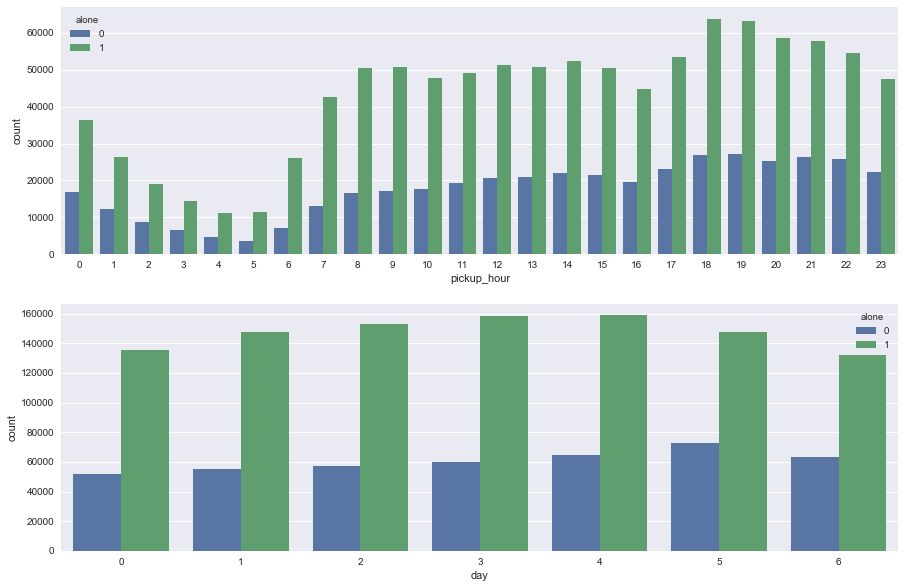

In [61]:
# Loneliness
f, ax = plt.subplots(nrows=2, figsize=(15,10))
sns.countplot('pickup_hour', hue='alone', data=train, ax=ax[0])
sns.countplot('day', hue='alone', data=train, ax=ax[1])

People seems to travel lonely on week day and on the morning/evening, those taxi trips should be to go to work.  